In [1]:
import pandas as pd
import numpy as np
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#读取数据集中的json文件
with open('./shipsnet.json') as data_file:
    dataset = json.load(data_file)

In [3]:
#将数据转换为数组，并通过坐标轴表示
x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [4]:
#统计判断是否为船的标签数量
pd.Series(y).value_counts()

0    3000
1    1000
dtype: int64

In [5]:
x.shape

(4000, 19200)

In [6]:
#将卫星图片数据（x）添加三列，存储对应的RGB值,并转换维度
x_reshaped = x.reshape([-1, 3, 80, 80]).transpose([0, 2, 3, 1])
x_reshaped.shape

(4000, 80, 80, 3)

In [7]:
#给标签数组加上标签(0:Not Ship, 1: Ship)
class_names = ['Not Ship', 'Ship']
y_reshaped = tf.keras.utils.to_categorical(y, num_classes=2)
y_reshaped.shape

(4000, 2)

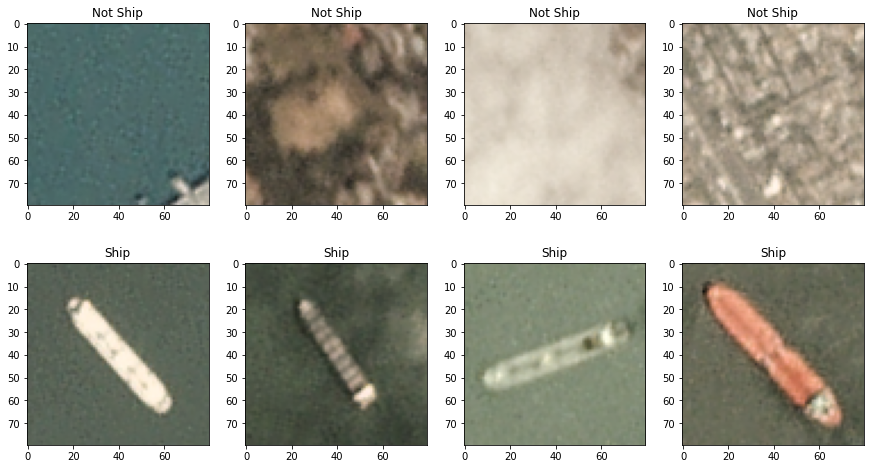

In [8]:
#可视化卫星图片
img_0 = x_reshaped[y==0]
img_1 = x_reshaped[y==1]

def plot(a,b):
    plt.figure(figsize=(15, 15))
    plt.subplot(2,4,1)
    plt.title('Not Ship')
    plt.imshow(a[0])
    plt.subplot(2,4,2)
    plt.title('Not Ship')
    plt.imshow(a[1])
    plt.subplot(2,4,3)
    plt.title('Not Ship')
    plt.imshow(a[2])
    plt.subplot(2,4,4)
    plt.title('Not Ship')
    plt.imshow(a[3])
    plt.subplot(2,4,5)
    plt.title('Ship')
    plt.imshow(b[0])
    plt.subplot(2,4,6)
    plt.title('Ship')
    plt.imshow(b[1])
    plt.subplot(2,4,7)
    plt.title('Ship')
    plt.imshow(b[2])
    plt.subplot(2,4,8)
    plt.title('Ship')
    plt.imshow(b[3])
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)
    
plot(img_0, img_1)

In [9]:
#归一化数据集
x_reshaped = x_reshaped / 255

#初步划分训练集、测试集和验证集
x_train_full, x_test, y_train_full, y_test = train_test_split(x_reshaped, y_reshaped, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.25, random_state=42)

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_val:', x_val.shape)
print('y_val:', x_val.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (2400, 80, 80, 3)
y_train: (2400, 2)
x_val: (800, 80, 80, 3)
y_val: (800, 80, 80, 3)
x_test: (800, 80, 80, 3)
y_test: (800, 2)


In [10]:
#使用多层感知器MLP模型
model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
#训练模型
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))  #如果首次精度较高，仅需要增加迭代次数，最大小于100次

Train on 2400 samples, validate on 800 samples
Epoch 1/50
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.7491 - acc: 0.7663 - val_loss: 0.4505 - val_acc: 0.8188
Epoch 2/50
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.4393 - acc: 0.8267 - val_loss: 0.6218 - val_acc: 0.7962
Epoch 3/50
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.4141 - acc: 0.8346 - val_loss: 0.3018 - val_acc: 0.8775
Epoch 4/50
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.3157 - acc: 0.8783 - val_loss: 0.2827 - val_acc: 0.8913
Epoch 5/50
2400/2400 [==============================] - 4s 2ms/sample - loss: 0.2832 - acc: 0.8883 - val_loss: 0.3250 - val_acc: 0.8788
Epoch 6/50
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.2896 - acc: 0.8904 - val_loss: 0.2373 - val_acc: 0.9025
Epoch 7/50
2400/2400 [==============================] - 3s 1ms/sample - loss: 0.2844 - acc: 0.8933 - val_loss: 0.2380 - val_acc: 0.9075
E

In [12]:
#MLP模型评估
model.evaluate(x_test, y_test)

800/800 [==============================] - 0s 565us/sample - loss: 0.3096 - acc: 0.9025


[0.3096057094633579, 0.9025]

<AxesSubplot:>

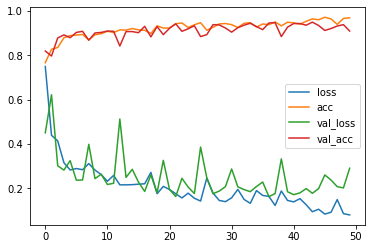

In [13]:
#训练精度可视化
pd.DataFrame(history.history).plot()

In [15]:
#使用卷积核的卷积网络
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [17]:
#训练模型
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))  #如果首次精度较高，仅需要增加迭代次数，最大小于100次

Train on 2400 samples, validate on 800 samples
Epoch 1/50
2400/2400 [==============================] - 30s 13ms/sample - loss: 0.3190 - acc: 0.8742 - val_loss: 0.3177 - val_acc: 0.8650
Epoch 2/50
2400/2400 [==============================] - 26s 11ms/sample - loss: 0.2381 - acc: 0.9004 - val_loss: 0.2301 - val_acc: 0.9150
Epoch 3/50
2400/2400 [==============================] - 24s 10ms/sample - loss: 0.1898 - acc: 0.9208 - val_loss: 0.1904 - val_acc: 0.9287
Epoch 4/50
2400/2400 [==============================] - 23s 10ms/sample - loss: 0.1957 - acc: 0.9204 - val_loss: 0.1942 - val_acc: 0.9337
Epoch 5/50
2400/2400 [==============================] - 23s 10ms/sample - loss: 0.1553 - acc: 0.9388 - val_loss: 0.1634 - val_acc: 0.9488
Epoch 6/50
2400/2400 [==============================] - 23s 10ms/sample - loss: 0.1231 - acc: 0.9563 - val_loss: 0.1774 - val_acc: 0.9350
Epoch 7/50
2400/2400 [==============================] - 25s 10ms/sample - loss: 0.1089 - acc: 0.9592 - val_loss: 0.1307 - val

In [18]:
#CNN模型评估
model.evaluate(x_test, y_test)

800/800 [==============================] - 2s 2ms/sample - loss: 0.1011 - acc: 0.9875


[0.10107680153043475, 0.9875]

<AxesSubplot:>

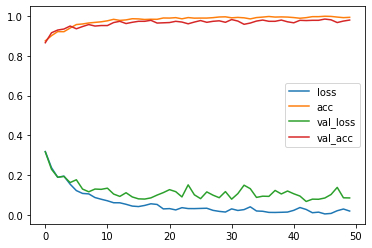

In [19]:
#训练精度可视化
pd.DataFrame(history.history).plot()